In [1]:
# Importing required libraries.
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,f1_score ,classification_report ,confusion_matrix ,precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier , AdaBoostClassifier , BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
print('All imports done.')

All imports done.


In [2]:
# Reading the dataset into pandas dataframe
data = pd.read_csv("C:/Users/HP/Downloads/ML/DataSets/creditcardfraud_ds.csv")  
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Get the info related to data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Time in this case is an unnecessary factor
data.drop(['Time'] , axis= 1 , inplace= True) 
print(data.shape)

(284807, 30)


In [5]:
# removing the duplicates from the data
data.drop_duplicates(keep= 'first' , inplace= True)
print(data.shape)

(275663, 30)


In [6]:
# checking whether there are any empty cells in data
data.isnull().values.any() 

False

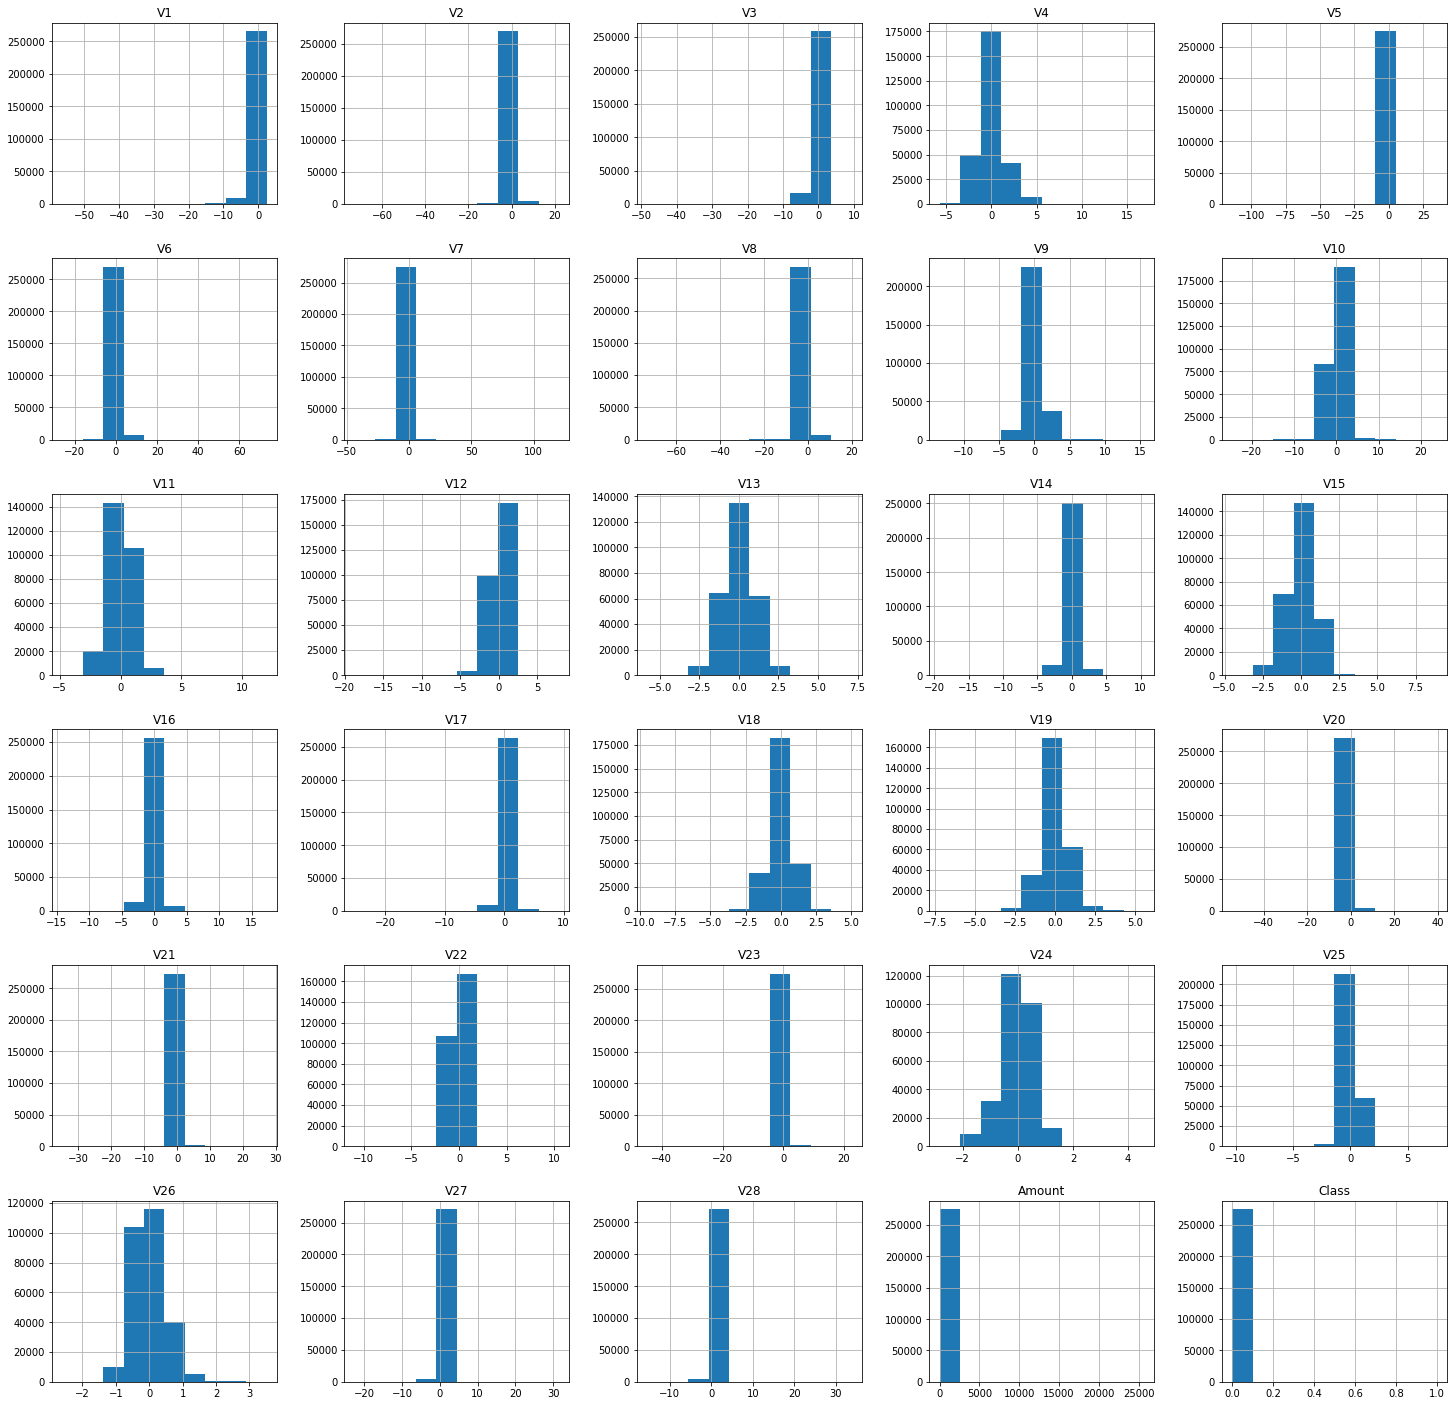

In [7]:
# plots the histograms of the each feature.
data.hist(figsize= (25,25))
plt.show()

<AxesSubplot:>

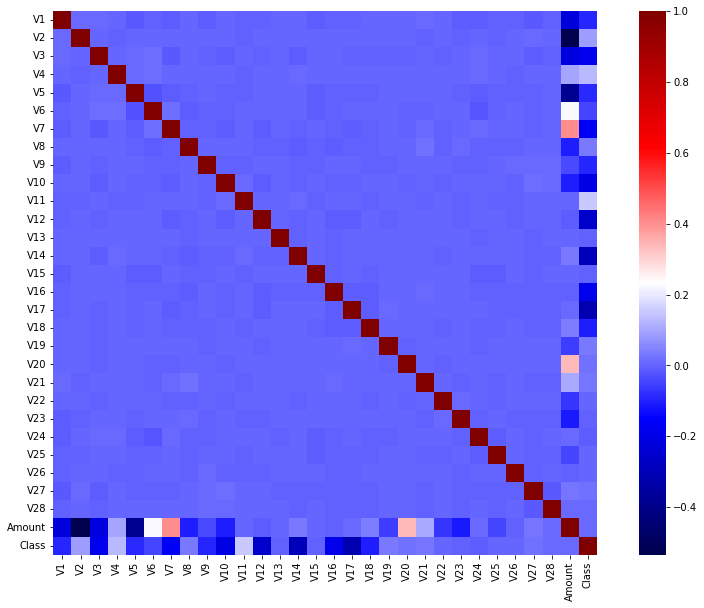

In [8]:
# Correlation Matrix
fig = plt.figure(figsize=(15,10))
sns.heatmap(data.corr() , square= True , cmap= plt.get_cmap('seismic'))

Text(0, 0.5, 'Frequency (Number of transactions)')

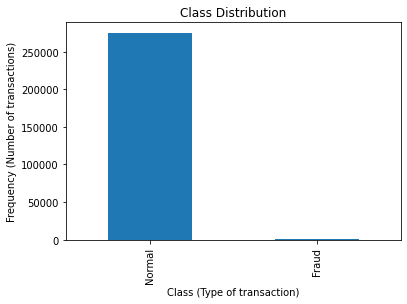

In [9]:
# plotting a bar graph showing normal transactions and fraud transactions.
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind= 'bar')
plt.xticks(range(2),['Normal','Fraud'])
plt.title('Class Distribution')
plt.xlabel('Class (Type of transaction)') 
plt.ylabel('Frequency (Number of transactions)')

From the above bar graph , We can conclude that dataset is highly imbalanced.

In [10]:
# Finding the number of normal transactions and fraud transactions in the dataset.
normal = data[data['Class'] == 0] 
fraud = data[data['Class'] == 1]

print('Number of normal transactions are :' , normal.shape[0])
print('Number of fraud transactions are :' , fraud.shape[0])
print('Total number of transactions are :' , data.shape[0])

Number of normal transactions are : 275190
Number of fraud transactions are : 473
Total number of transactions are : 275663


In [11]:
# Splitting the dataset into X (input) and Y(output) . 
# Input containing data of all columns except column Class.
# Output contains data from column Class , which predicts transaction is fraud or not.
X = data.drop('Class',axis= 1)
Y = data['Class']

X = StandardScaler().fit_transform(X)
[X.shape,Y.shape]

[(275663, 29), (275663,)]

In [12]:
# Spitting the given data into 80:20 making training set and test set.
# random_state is set so that we can control shuffing and output can be reproducible 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.8, random_state= 4) 
[[ X_train.shape , Y_train.shape ],[ X_test.shape , Y_test.shape ]]

[[(220530, 29), (220530,)], [(55133, 29), (55133,)]]

In [13]:
# Finding outlier fraction of the training set to improve training accuracy. 
train_normal , train_fraud = Y_train.value_counts()
Y_train.value_counts()
outlier_fraction = train_fraud / train_normal 
outlier_fraction 

0.001753397776001163

##### Next step is to train the model using train set and test it with the test set. Now , I will process the data with several anomaly detection models. The models will be judged based on the following properties :
1. Accuracy  = Number of correct predictions / Total number of predictions.    
As our data set is highly imbalanced , accuracy cannot be a perfect measure to measure the performance of the model.  

2. Precision = Number of correct predictions in a class(Normal/Fraud) / Number of predicted labels in that class.  
That implies , Precision = True Positives / (True Positives + False Positives)   

3. Recall    = Number of correct predictions in a class(Normal/Fraud) / Number of actual labels in that class.   
That implies , Recall = True Positives / (True Positives + False Negatives)     
    
   Now , we develop a Precision-Recall trade off. So we use the F1 score , which strikes a balance between Precision and Recall.   

4. F1 Score  = Harmonic mean of precision and recall.   
That implies , F1 Score = True Positives / (True Positives + 1/2(False postives + False Negatives))  

   And we have two averaging techniques , macro avg(unweighted average) and weighted avg . We prefer macro avg as our dataset is imbalanced.

In [14]:
def confusion_matrix_plot(Y,y):
    plt.figure(figsize=(6,6))
    data = confusion_matrix(Y,y) 
    l = ['Normal','Fraud']
    sns.heatmap(data,annot= True,annot_kws= {'size':18},fmt= 'd',linewidths= .5,cmap= 'PiYG',square= True,xticklabels= l ,yticklabels= l)
    plt.ylabel('Actual transaction')
    plt.xlabel('Predicted transaction')

In [15]:
def pr_curve(Y,y_):
    precision , recall , _ = precision_recall_curve(Y,y_)
    _ , ax = plt.subplots()
    ax.plot(recall , precision)

    ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')
    plt.show()

# Model 1 : Logistic Regression

In [16]:
LR = LogisticRegression(solver='liblinear' , max_iter= 1000 , random_state= 4)
LR.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, random_state=4, solver='liblinear')

In [17]:
def lr_predict(X,Y):
    y = LR.predict(X)
    y_ = LR.predict_proba(X)[:,1]

    print("Accuracy Score :" , accuracy_score(Y,y))

    print("F1 Score :" , f1_score(Y,y,average='macro'))

    confusion_matrix_plot(Y,y)

    pr_curve(Y,y_)

    print(classification_report(Y,y))

Accuracy Score : 0.999147508275518
F1 Score : 0.8564938766866166


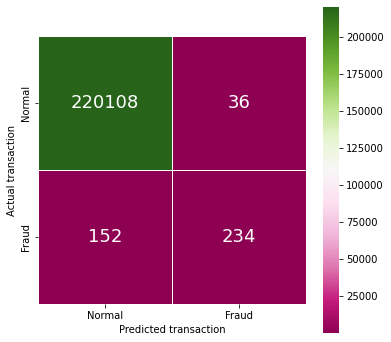

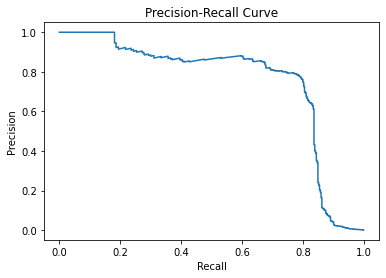

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    220144
           1       0.87      0.61      0.71       386

    accuracy                           1.00    220530
   macro avg       0.93      0.80      0.86    220530
weighted avg       1.00      1.00      1.00    220530



In [18]:
lr_predict(X_train , Y_train)  

Accuracy Score : 0.9991112400921408
F1 Score : 0.820945416831343


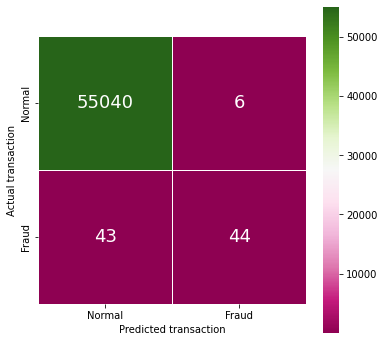

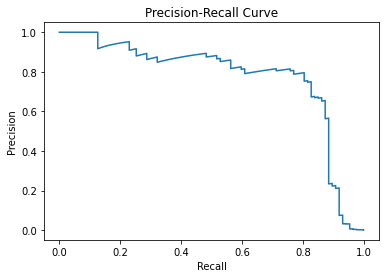

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55046
           1       0.88      0.51      0.64        87

    accuracy                           1.00     55133
   macro avg       0.94      0.75      0.82     55133
weighted avg       1.00      1.00      1.00     55133



In [19]:
lr_predict(X_test , Y_test)

# Model 2 : Random Forest

In [20]:
rfc = RandomForestClassifier( criterion= 'gini' , max_samples= len(X_train) ,  random_state= 4) 
rfc.fit(X_train,Y_train)

RandomForestClassifier(max_samples=220530, random_state=4)

In [21]:
def rfc_predict(X,Y):
    y = rfc.predict(X)  
    y_ = rfc.predict_proba(X)[:,1]
    
    print("Accuracy Score :" , accuracy_score(Y,y))

    print("F1 Score :" , f1_score(Y,y,average='macro'))

    confusion_matrix_plot(Y,y)

    pr_curve(Y,y_)

    print(classification_report(Y,y))

Accuracy Score : 1.0
F1 Score : 1.0


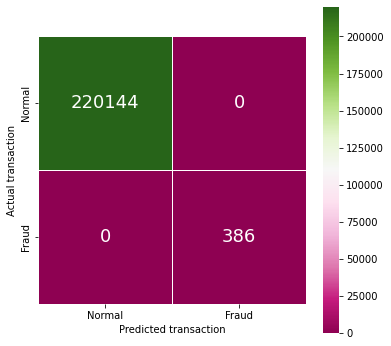

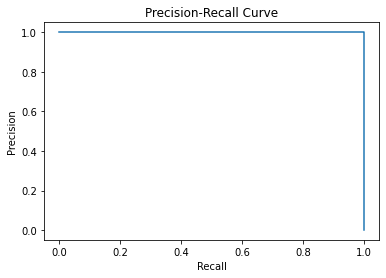

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    220144
           1       1.00      1.00      1.00       386

    accuracy                           1.00    220530
   macro avg       1.00      1.00      1.00    220530
weighted avg       1.00      1.00      1.00    220530



In [22]:
rfc_predict(X_train , Y_train)

Accuracy Score : 0.9996191028966318
F1 Score : 0.9338669023664973


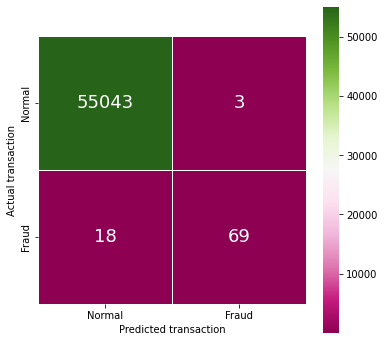

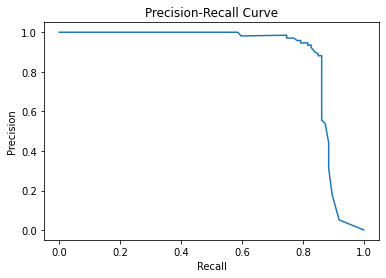

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55046
           1       0.96      0.79      0.87        87

    accuracy                           1.00     55133
   macro avg       0.98      0.90      0.93     55133
weighted avg       1.00      1.00      1.00     55133



In [23]:
rfc_predict(X_test , Y_test)

# Model 3 : Extra Trees

In [24]:
et = ExtraTreesClassifier(max_samples= len(X_train) ,criterion= 'gini' ,bootstrap= True ,random_state= 4)
et.fit(X_train,Y_train)

ExtraTreesClassifier(bootstrap=True, max_samples=220530, random_state=4)

In [25]:
def et_predict(X,Y):
    y = et.predict(X)
    y_ = et.predict_proba(X)

    print("Accuracy Score :" , accuracy_score(Y,y))

    print("F1 Score :" , f1_score(Y,y,average='macro'))

    confusion_matrix_plot(Y,y)

    pr_curve(Y,y_[:,1])

    print(classification_report(Y,y))

Accuracy Score : 1.0
F1 Score : 1.0


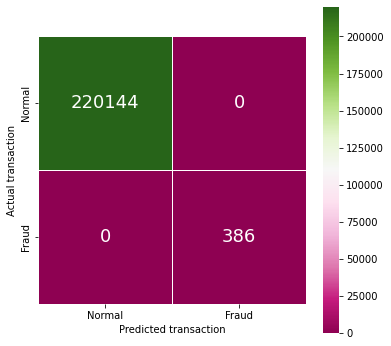

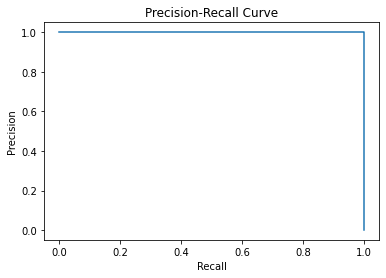

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    220144
           1       1.00      1.00      1.00       386

    accuracy                           1.00    220530
   macro avg       1.00      1.00      1.00    220530
weighted avg       1.00      1.00      1.00    220530



In [26]:
et_predict(X_train , Y_train) 

Accuracy Score : 0.9996009649393285
F1 Score : 0.9293872793872793


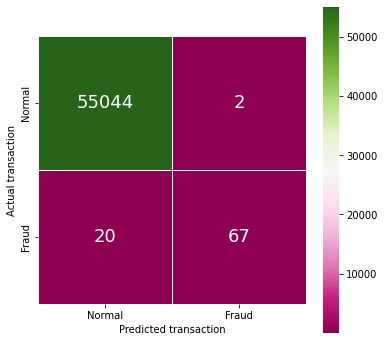

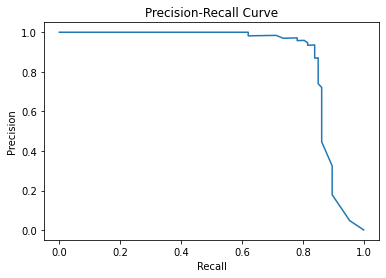

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55046
           1       0.97      0.77      0.86        87

    accuracy                           1.00     55133
   macro avg       0.99      0.89      0.93     55133
weighted avg       1.00      1.00      1.00     55133



In [27]:
et_predict(X_test , Y_test) 

# Model 4 : AdaBoost

In [28]:
ab = AdaBoostClassifier(n_estimators= 150 , random_state= 4)
ab.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=150, random_state=4)

In [29]:
def ab_predict(X,Y):
    y = ab.predict(X)
    y_ = ab.predict_proba(X)

    print("Accuracy Score :" , accuracy_score(Y,y))

    print("F1 Score :" , f1_score(Y,y,average='macro'))

    confusion_matrix_plot(Y,y)

    pr_curve(Y,y_[:,1])

    print(classification_report(Y,y))

Accuracy Score : 0.9995012016505691
F1 Score : 0.9226279077742701


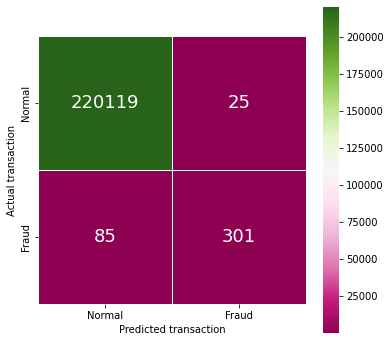

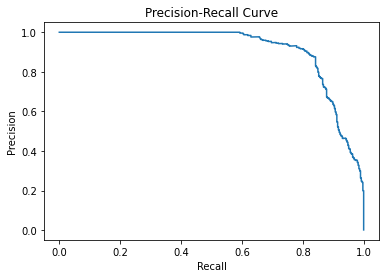

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    220144
           1       0.92      0.78      0.85       386

    accuracy                           1.00    220530
   macro avg       0.96      0.89      0.92    220530
weighted avg       1.00      1.00      1.00    220530



In [30]:
ab_predict(X_train , Y_train) 

Accuracy Score : 0.999419585366296
F1 Score : 0.9034691353971744


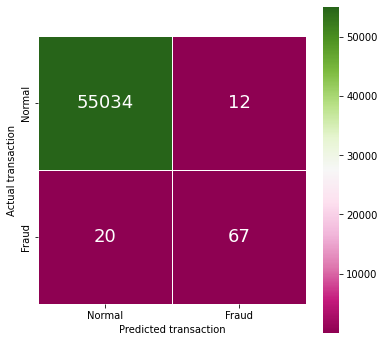

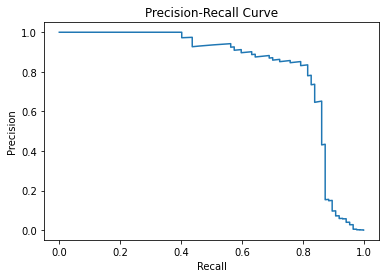

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55046
           1       0.85      0.77      0.81        87

    accuracy                           1.00     55133
   macro avg       0.92      0.88      0.90     55133
weighted avg       1.00      1.00      1.00     55133



In [31]:
ab_predict(X_test , Y_test) 

# Model 5 : Bagging

In [32]:
bg = BaggingClassifier(n_estimators= 20 , max_samples= len(X_train) , random_state= 4)
bg.fit(X_train,Y_train)

BaggingClassifier(max_samples=220530, n_estimators=20, random_state=4)

In [33]:
def bg_predict(X,Y):
    y = bg.predict(X)
    y_ = bg.predict_proba(X)

    print("Accuracy Score :" , accuracy_score(Y,y))

    print("F1 Score :" , f1_score(Y,y,average='macro'))

    confusion_matrix_plot(Y,y)

    pr_curve(Y,y_[:,1])

    print(classification_report(Y,y))

Accuracy Score : 0.9999455856346076
F1 Score : 0.9921123571176187


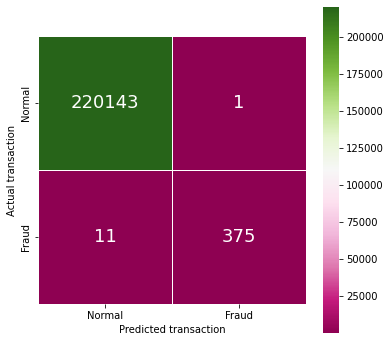

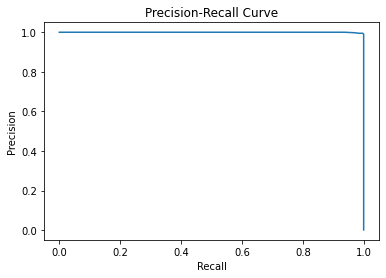

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    220144
           1       1.00      0.97      0.98       386

    accuracy                           1.00    220530
   macro avg       1.00      0.99      0.99    220530
weighted avg       1.00      1.00      1.00    220530



In [34]:
bg_predict(X_train , Y_train) 

Accuracy Score : 0.9995646890247221
F1 Score : 0.9219689421302324


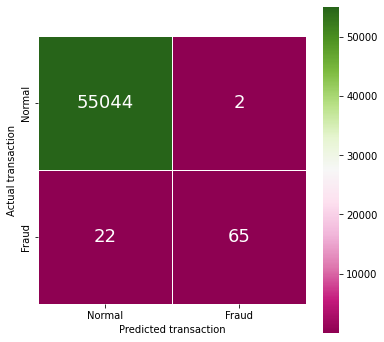

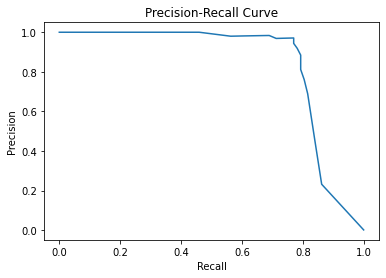

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55046
           1       0.97      0.75      0.84        87

    accuracy                           1.00     55133
   macro avg       0.98      0.87      0.92     55133
weighted avg       1.00      1.00      1.00     55133



In [35]:
bg_predict(X_test , Y_test) 

# Model 6 : Decision Trees

In [36]:
dt = DecisionTreeClassifier(criterion= 'gini' , random_state= 4)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=4)

In [37]:
def dt_predict(X,Y):
    y = dt.predict(X)
    y_ = dt.predict_proba(X)

    print("Accuracy Score :" , accuracy_score(Y,y))

    print("F1 Score :" , f1_score(Y,y,average='macro'))

    confusion_matrix_plot(Y,y)

    pr_curve(Y,y_[:,1])

    print(classification_report(Y,y))

Accuracy Score : 1.0
F1 Score : 1.0


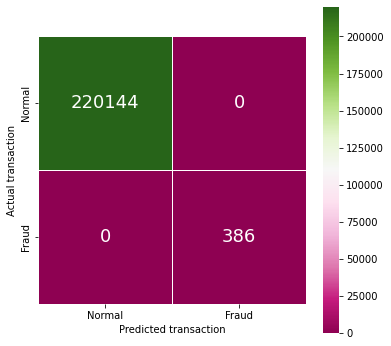

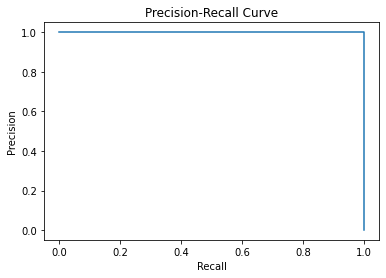

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    220144
           1       1.00      1.00      1.00       386

    accuracy                           1.00    220530
   macro avg       1.00      1.00      1.00    220530
weighted avg       1.00      1.00      1.00    220530



In [38]:
dt_predict(X_train , Y_train) 

Accuracy Score : 0.9992926196651734
F1 Score : 0.8896533790611019


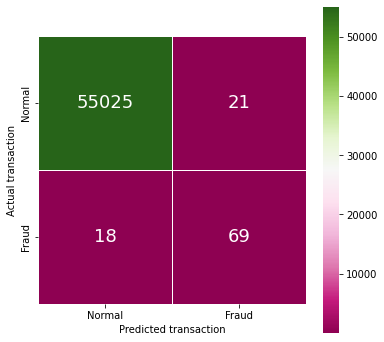

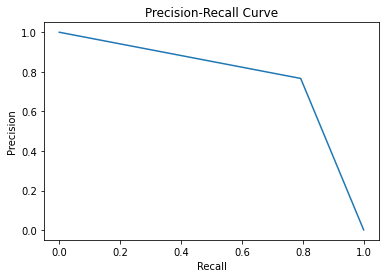

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55046
           1       0.77      0.79      0.78        87

    accuracy                           1.00     55133
   macro avg       0.88      0.90      0.89     55133
weighted avg       1.00      1.00      1.00     55133



In [39]:
dt_predict(X_test , Y_test) 

# Model 7 : XG Boost

In [40]:
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [41]:
def xgb_predict(X,Y):
    y = xgb.predict(X)
    y_ = xgb.predict_proba(X)

    print("Accuracy Score :" , accuracy_score(Y,y))

    print("F1 Score :" , f1_score(Y,y,average='macro'))

    confusion_matrix_plot(Y,y)

    pr_curve(Y,y_[:,1])

    print(classification_report(Y,y))

Accuracy Score : 1.0
F1 Score : 1.0


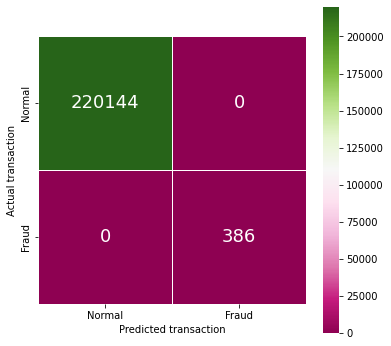

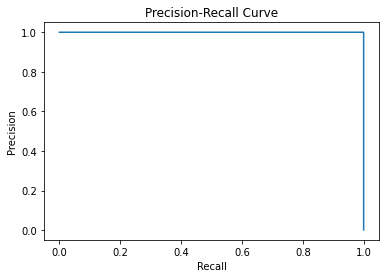

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    220144
           1       1.00      1.00      1.00       386

    accuracy                           1.00    220530
   macro avg       1.00      1.00      1.00    220530
weighted avg       1.00      1.00      1.00    220530



In [42]:
xgb_predict(X_train , Y_train) 

Accuracy Score : 0.9996916547258448
F1 Score : 0.9464636828681169


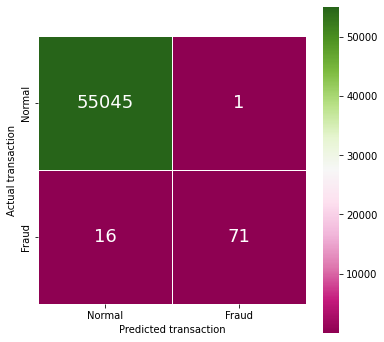

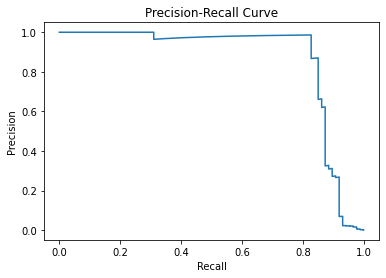

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55046
           1       0.99      0.82      0.89        87

    accuracy                           1.00     55133
   macro avg       0.99      0.91      0.95     55133
weighted avg       1.00      1.00      1.00     55133



In [43]:
xgb_predict(X_test , Y_test) 

# Neural Networks [Implemented in TensorFlow]

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [53]:
model = Sequential(
    [
        tf.keras.Input(shape=(29,)) ,
        Dense(units= 20 , activation= 'relu') , 
        Dense(units= 7  , activation= 'relu') ,
        Dense(units= 1  , activation= 'sigmoid') ,
    ]
)

In [54]:
model.compile(loss= BinaryCrossentropy() , optimizer= Adam(0.001))

In [55]:
model.fit(X_train , Y_train , epochs= 25)

Epoch 1/25
6892/6892 [==============================] - 11s 2ms/step - loss: 0.0265
Epoch 2/25
6892/6892 [==============================] - 9s 1ms/step - loss: 0.0034
Epoch 3/25
6892/6892 [==============================] - 9s 1ms/step - loss: 0.0030
Epoch 4/25
6892/6892 [==============================] - 9s 1ms/step - loss: 0.0028
Epoch 5/25
6892/6892 [==============================] - 9s 1ms/step - loss: 0.0026
Epoch 6/25
6892/6892 [==============================] - 9s 1ms/step - loss: 0.0025
Epoch 7/25
6892/6892 [==============================] - 9s 1ms/step - loss: 0.0024
Epoch 8/25
6892/6892 [==============================] - 9s 1ms/step - loss: 0.0024
Epoch 9/25
6892/6892 [==============================] - 10s 1ms/step - loss: 0.0022
Epoch 10/25
6892/6892 [==============================] - 9s 1ms/step - loss: 0.0022
Epoch 11/25
6892/6892 [==============================] - 10s 1ms/step - loss: 0.0022
Epoch 12/25
6892/6892 [==============================] - 9s 1ms/step - loss: 0.002

In [56]:
def nn_predict(X,Y):
    y_ = model.predict(X)
    y = tf.round(y_)

    print("Accuracy Score :" , accuracy_score(Y,y))

    print("F1 Score :" , f1_score(Y,y,average='macro'))

    confusion_matrix_plot(Y,y)

    pr_curve(Y,y_)

    print(classification_report(Y,y))

6892/6892 [==============================] - 7s 1ms/step
Accuracy Score : 0.9997369972339364
F1 Score : 0.9605319654933937


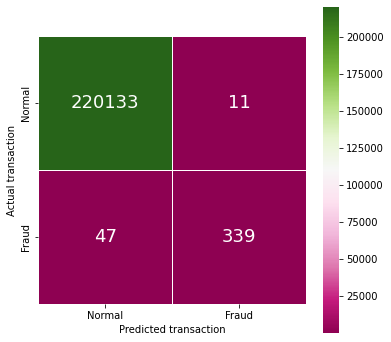

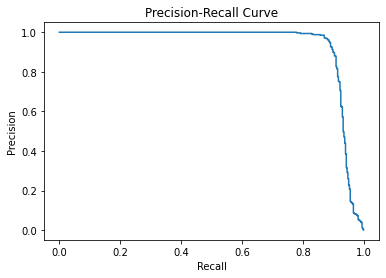

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    220144
           1       0.97      0.88      0.92       386

    accuracy                           1.00    220530
   macro avg       0.98      0.94      0.96    220530
weighted avg       1.00      1.00      1.00    220530



In [57]:
nn_predict(X_train,Y_train)

1723/1723 [==============================] - 2s 1ms/step
Accuracy Score : 0.9994739992382058
F1 Score : 0.9119895148614234


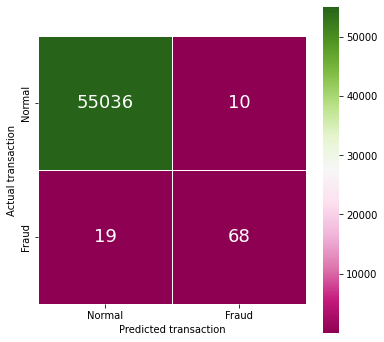

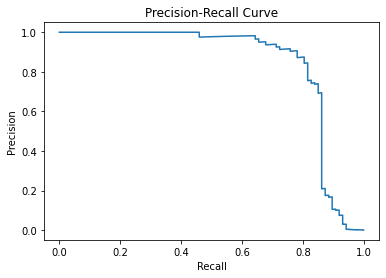

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55046
           1       0.87      0.78      0.82        87

    accuracy                           1.00     55133
   macro avg       0.94      0.89      0.91     55133
weighted avg       1.00      1.00      1.00     55133



In [58]:
nn_predict(X_test , Y_test)